In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ex2data1.csv",header=None)

def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    # Min Max Normalization
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

# Expand the Dimention
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

# Get the rows and Columns
m = X.shape[0]  # rows
n = X.shape[1] # columns

# Standarize the data
X = featureNormalization(X)[0]

X = np.append(np.ones((m,1)),X,axis=1)
y = y[:, np.newaxis]

# Coefficinets Values
theta = np.zeros((n+1,1))
alpha =1
J_history =[]
epochs = []

In [8]:
for i in range(150):
    
    # Compute Linear Regression
    z = np.dot(X,theta)
    
    # Apply Sigmoid Function for 'Linear Regression'
    predictions = 1 /(1+ np.exp(-z))
    
    # Loss Function '0'
    error_class1 = -y * np.log(predictions)
    
    # Loss Function '1'
    error_class2 = (1-y) * np.log(1-predictions)
    
    # Total Error
    error = error_class1 - error_class2
    
    # Computer Cost Function
    cost = (1/m) * np.sum(error)
    
    print("Cost:",cost)
    
    # Compter Gradient Descent
    grad = (1/m) * np.dot(X.transpose(),(predictions - y))
    theta = theta - (alpha * grad)
    
    J_history.append(cost)
    
    epochs.append(i)

Cost: 0.6931471805599453
Cost: 0.5594032425459355
Cost: 0.4805876648541631
Cost: 0.4304634223606356
Cost: 0.3960564700567126
Cost: 0.37096692789156277
Cost: 0.35181143821805577
Cost: 0.33666258235076085
Cost: 0.32434847925296484
Cost: 0.31411698800114685
Cost: 0.30546328987830246
Cost: 0.2980357306451387
Cost: 0.29158158307976256
Cost: 0.2859143408865026
Cost: 0.2808932044247527
Cost: 0.2764097679844742
Cost: 0.2723791206514711
Cost: 0.2687337409290947
Cost: 0.26541921086785414
Cost: 0.2623911455100091
Cost: 0.2596129525840705
Cost: 0.2570541709685167
Cost: 0.25468922003511113
Cost: 0.2524964455377944
Cost: 0.25045738276667306
Cost: 0.24855618108086244
Cost: 0.24677914982691884
Cost: 0.24511439662403456
Cost: 0.24355153668979462
Cost: 0.24208145734768693
Cost: 0.24069612579357408
Cost: 0.23938843106582228
Cost: 0.23815205327611225
Cost: 0.23698135473018153
Cost: 0.23587128874932464
Cost: 0.23481732289958948
Cost: 0.2338153740210045
Cost: 0.23286175297764025
Cost: 0.23195311745986108
Co

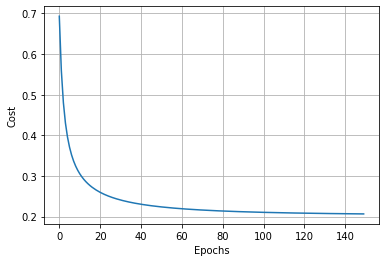

In [9]:
plt.plot(epochs,J_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.grid()

In [10]:
# The drop is sharper and cost function plateau around the 150 iterations.
# Get the optimized theta at iteration of 150
theta

array([[1.41957362],
       [3.35941597],
       [3.11271333]])

In [11]:
y_predicted = np.dot(X,np.array([[1.41957362],[3.35941597],[3.11271333]]))

In [12]:
y_pre = []

for i in range(len(y_predicted)):
    if y_predicted[i] < 0.5:
        y_pre.append(0)
    else:
        y_pre.append(1)

In [13]:
df["Predicted"] = y_pre

In [14]:
df

,0,1,2,Predicted
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,0
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1
...,...,...,...,...
95,83.489163,48.380286,1,1
96,42.261701,87.103851,1,1
97,99.315009,68.775409,1,1
98,55.340018,64.931938,1,0
